In [282]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [283]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates=True,index_col=0)

In [293]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<ipython-input-296-556d23f29bce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df.index.year
<ipython-input-296-556d23f29bce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df.index.month
<ipython-input-296-556d23f29bce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Text(0, 0.5, 'Average Page Views')

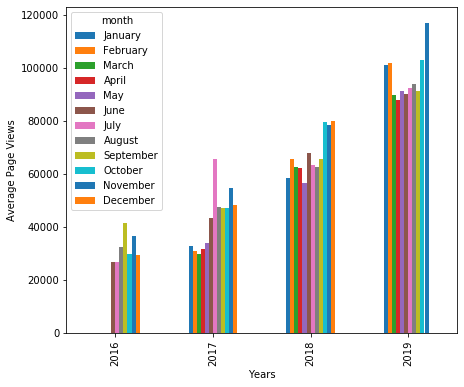

In [296]:

# Remove possible outliers (i.e, top and bottom 2.5 percentiles)
df = df[
    (df["value"] > df["value"].quantile(0.025)) &
    (df["value"] < df["value"].quantile(0.975))
]

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# Create a column that has the year of each date recording
df["year"] = df.index.year
# Create a column that has the month (1-12) of each date recording
df["month"] = df.index.month
# Map the month integers to their proper names
df["month"] = df["month"].apply(
    lambda data: months[data-1]
)
# Make this a categorical column so it can be sorted by the order of values\
# in the `months` list, i.e., the proper month order
df["month"] = pd.Categorical(df["month"], categories=months)

# Pivot the DF so that there's a column for each month, each row\
# represents a year, and the cells have the mean page views for the\
# respective year and month
df_pivot = pd.pivot_table(
	df,
	values="value",
	index="year",
	columns="month",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* I think when you sort the data from highest to lowest, you have to remove the highest 2.5% and the lowest 2.5%.

In [285]:
m=math.floor(df.sort_values(by=['value']).shape[0]-float(df.sort_values(by=['value']).shape[0])*0.025)

In [286]:
n=math.floor(float(df.sort_values(by=['value']).shape[0])*0.025)

In [287]:
df=df.sort_values(by=['value'])[n:m+1]

* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

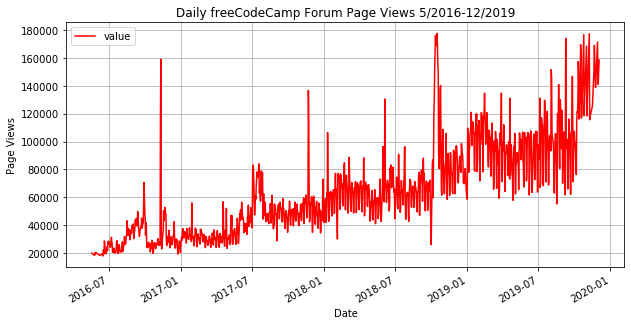

In [288]:
fig, ax = plt.subplots(figsize=(10,5))
df.plot(kind='line',y='value',title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019", grid=True,fontsize=10, ax=ax,color='red')
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
plt.show()

* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [289]:
df.keys()

Index(['value'], dtype='object')

In [291]:
df["date"] = pd.to_datetime(df["date"])
# Sort the DF from oldest to most recent recordings
df.sort_values(by="date", inplace=True)
# Use the column of dates as the DF's index
df.set_index(["date"], inplace=True)

# Remove possible outliers (i.e, top and bottom 2.5 percentiles)
df = df[
    (df["page_views"] > df["page_views"].quantile(0.025)) &
    (df["page_views"] < df["page_views"].quantile(0.975))
]

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# Create a column that has the year of each date recording
df["year"] = df.index.year
# Create a column that has the month (1-12) of each date recording
df["month"] = df.index.month
# Map the month integers to their proper names
df["month"] = df["month"].apply(
    lambda data: months[data-1]
)
# Make this a categorical column so it can be sorted by the order of values\
# in the `months` list, i.e., the proper month order
df["month"] = pd.Categorical(df["month"], categories=months)

# Pivot the DF so that there's a column for each month, each row\
# represents a year, and the cells have the mean page views for the\
# respective year and month
df_pivot = pd.pivot_table(
	df,
	values="page_views",
	index="year",
	columns="month",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

KeyError: 'date'

In [ ]:
df.index[1]

In [ ]:
df["newDate"]=np.array([i.strftime("%Y-%m-%d") for i in df.index])

In [ ]:
s_2016=df.sort_values(by=['value'])['newDate'].str.split("-",expand=True)[2]=="2016"

In [ ]:
month = {'01':'Janauary','02':'February',
'03':'March','04':'April','05':'May','06':'June','07':'July','08':'August','09':'September','10':'October','11':'November','12':'December'}

In [ ]:
s_2016=[i for i in df.sort_index().index if i.strftime("%Y")=="2016"]
s_2016_min=s_2016[0]

s_2016_max=s_2016[-1]
data_range=df.loc[(df.index>= s_2016_min)& (df.index<= s_2016_max)].sort_index()




In [ ]:
data_range

In [ ]:
### get the avarage of one month

years=['2016','2017','2018','2019']
data=[]
for year in years:
    month_avrage=[]
    for k in month:
        x=[j for j in [i for i in df.sort_index().index if i.strftime("%Y")==year] if j.strftime("%m")==str(k) ]
        if x!=[]:
            month_avrage.append(df.loc[(df.index>=x[0])& (df.index<= x[-1])].sort_index().value.mean())
        else :
            month_avrage.append(0)
    data.append(month_avrage)
print(data)

In [ ]:
for k in data:
    print(len(k))

In [ ]:
col=["#ff700a","#007bb4" ,"#00c3cf" ,"#bdbc23" ,"#7f7f7f" ,"#f26dc2" ,"#914f49" ,"#8456a1" ,"#e80027" ,"#00a32d" ,"#ff700a" ,"#007bb4"][::-1]

In [ ]:
X = np.arange(12)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ss=0.0
for i in data:
    for k in range(len(i)):
        ax.bar(X + ss, data[0], color = col[k], width = 0.25)
        ss+=0.25

ax.set_ylabel('"Average Page Views"')
ax.set_xlabel('Year')
ax.set_title("Months")
ax.legend(labels=list(month.values()))

In [ ]:
data_range[["Year","Month","day"]]=data_range.sort_index()['newDate'].str.split('-',expand=True,)
data_range['Views']=df["value"]

In [ ]:
data_range=data_range[["Year","Month","Views"]].reset_index()

In [ ]:
month_avrage=[]
for k in month:
    data_range.loc[data_range['Month']=="05"]['Views'].mean()

In [ ]:
data_range.pivot('Year','Month','Views').plot.bar()

In [ ]:
month_dict = {1 : "January", 2 : "February", 3 : "March", 4 : "April", 
              5 : "May" , 6 : "June", 7 : "July", 8 : "August", 
              9 : "September", 10 : "October" ,11 : "November",12 : "December"}

df[["Year","month","value"]].reset_index().pivot('Year','month','value').rename(columns=month_dict).plot.bar()

In [ ]:
data_range

In [ ]:
fig2, ax1 = plt.subplots(figsize=(10,5))
data_range.plot(kind='bar',y='value',title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019", grid=True,fontsize=10, ax=ax1)
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
plt.show()

In [ ]:
df.sort_values(by="newDate").loc[]

In [ ]:
s